In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

g:\anaconda\envs\my_tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

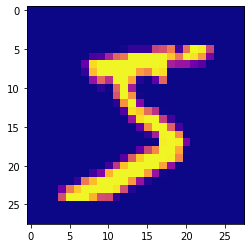

In [7]:
plt.imshow(single_image,cmap='plasma')

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train,10)

In [17]:
single_image.max()

255

In [18]:
x_train = x_train/255

In [19]:
x_test = x_test/255

In [20]:
scaled_image = x_train[0]

In [21]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train = x_train.reshape(60000,28,28,1)

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
x_test = x_test.reshape(10000,28,28,1)

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [32]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [35]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 613us/sample - loss: 0.1351 - accuracy: 0.9592 - val_loss: 0.0471 - val_accuracy: 0.9849
Epoch 2/10
60000/60000 [==============================] - 36s 607us/sample - loss: 0.0465 - accuracy: 0.9852 - val_loss: 0.0505 - val_accuracy: 0.9829


In [37]:
metrics = pd.DataFrame(model.history.history)

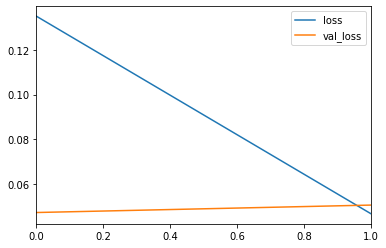

In [42]:
metrics[['loss','val_loss']].plot()

In [43]:
model.metrics_names

['loss', 'accuracy']

In [45]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.05046871579475701, 0.9829]

In [46]:
from sklearn.metrics import classification_report,classification_report,confusion_matrix

In [49]:
predictions = model.predict_classes(x_test)

In [50]:
y_cat_test.shape

(10000, 10)

In [51]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [53]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    1,    0,    0,    1,    0,    1,    0],
       [   0, 1127,    1,    3,    0,    1,    2,    0,    1,    0],
       [   2,    0, 1017,    7,    1,    0,    0,    4,    1,    0],
       [   0,    0,    0, 1002,    0,    7,    0,    0,    1,    0],
       [   0,    0,    2,    0,  970,    0,    4,    0,    2,    4],
       [   2,    0,    0,    3,    0,  884,    3,    0,    0,    0],
       [   5,    2,    0,    0,    1,    5,  944,    0,    1,    0],
       [   0,    2,    9,    3,    0,    1,    0, 1011,    1,    1],
       [   4,    0,    5,   10,    0,    5,    8,    2,  937,    3],
       [   3,    2,    1,    8,   10,   13,    0,    8,    4,  960]],
      dtype=int64)

In [54]:
my_number = x_test[0]

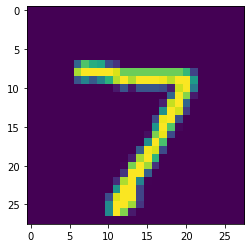

In [56]:
plt.imshow(my_number.reshape(28,28))

In [57]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)